# Task 4. Cluster Analysis

**REMEDIAL TASK**

The file **WIPO-GII_2022.xlsx** contains country-level data on the indicators used to calculate the Global Innovation Index for 2022.

### Variables:

- Country
- Business environment
- Business sophistication index
- Citable documents H-index
- Creative goods and services
- Creative goods exports, % total trade
- Creative outputs index
- Cultural and creative services exports, % total trade
- Domestic market scale, bn PPP
- Ecological sustainability
- Expenditure on education, % GDP
- Firms offering formal training, %
- General infrastructure
- Government effectiveness
- Government's online service
- Graduates in science and engineering, %
- Gross expenditure on R&D, % GDP
- High-tech exports, % total trade
- High-tech imports, % total trade
- High-tech manufacturing, %
- Human capital and research index
- Information and Communications Technology access
- Information and Communications Technology services exports, % total trade
- Information and Communications Technology services imports, % total trade
- Information and Communications Technology use
- Infrastructure index
- Intangible assets
- Joint venture/strategic alliance deals/bn PPP GDP
- Knowledge absorption
- Knowledge and technology outputs index
- Knowledge workers
- Knowledge-intensive employment, %
- Logistics performance
- Market sophistication index
- Mobile app creation/bn PPP GDP
- Online creativity
- PISA scales in reading, maths and science
- Political and operational stability
- Political environment
- Pupil-teacher ratio, secondary
- QS university ranking average score of top 3 universities
- Research and development (R&D)
- Scientific and technical articles/bn PPP GDP
- Software spending, % GDP
- Tertiary education
- Tertiary enrolment, % gross
- University-industry R&D collaboration
- Region
- Region2
- Euro area
- European Union
- OECD members
- Least developed countries
- Income
- High income

_Please complete the following tasks._

1. Select not less than **10** interval or ratio scale variables for cluster analysis, check that the selected data are applicable for cluster analysis. If there are significant correlations between variables do the principal component analysis for dimensionality reduction. It's possible that you extract components not from all of the initially selected variables, but only from a subset of them. Interpret the results of the KMO measure. Provide a detailed description of each component and justify the choice of its name. Indicate the percentage of the variance of the original variables explained by the extracted components. Save the components as variables in the dataset.

In [8]:
%pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=eb74ced7954a395e7ae45928ef127e78b5ca747406b4c8275279c8d7958809cd
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [1]:
pip install yellowbrick

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_excel('WIPO-GII_2022.xlsx')

In [15]:
print("Name variable (20):", df.columns[:20].tolist())

Name variable (20): ['Country', 'Business environment_2022', 'Business sophistication index_2022', 'Citable documents H-index_2022', 'Creative goods and services_2022', 'Creative goods exports, % total trade_2022', 'Creative outputs index_2022', 'Cultural and creative services exports, % total trade_2022', 'Domestic market scale, bn PPP$_2022', 'Ecological sustainability_2022', 'Expenditure on education, % GDP_2022', 'Firms offering formal training, %_2022', 'General infrastructure_2022', 'Government effectiveness_2022', "Government's online service_2022", 'Graduates in science and engineering, %_2022', 'Gross expenditure on R&D, % GDP_2022', 'High-tech exports, % total trade_2022', 'High-tech imports, % total trade_2022', 'High-tech manufacturing, %_2022']


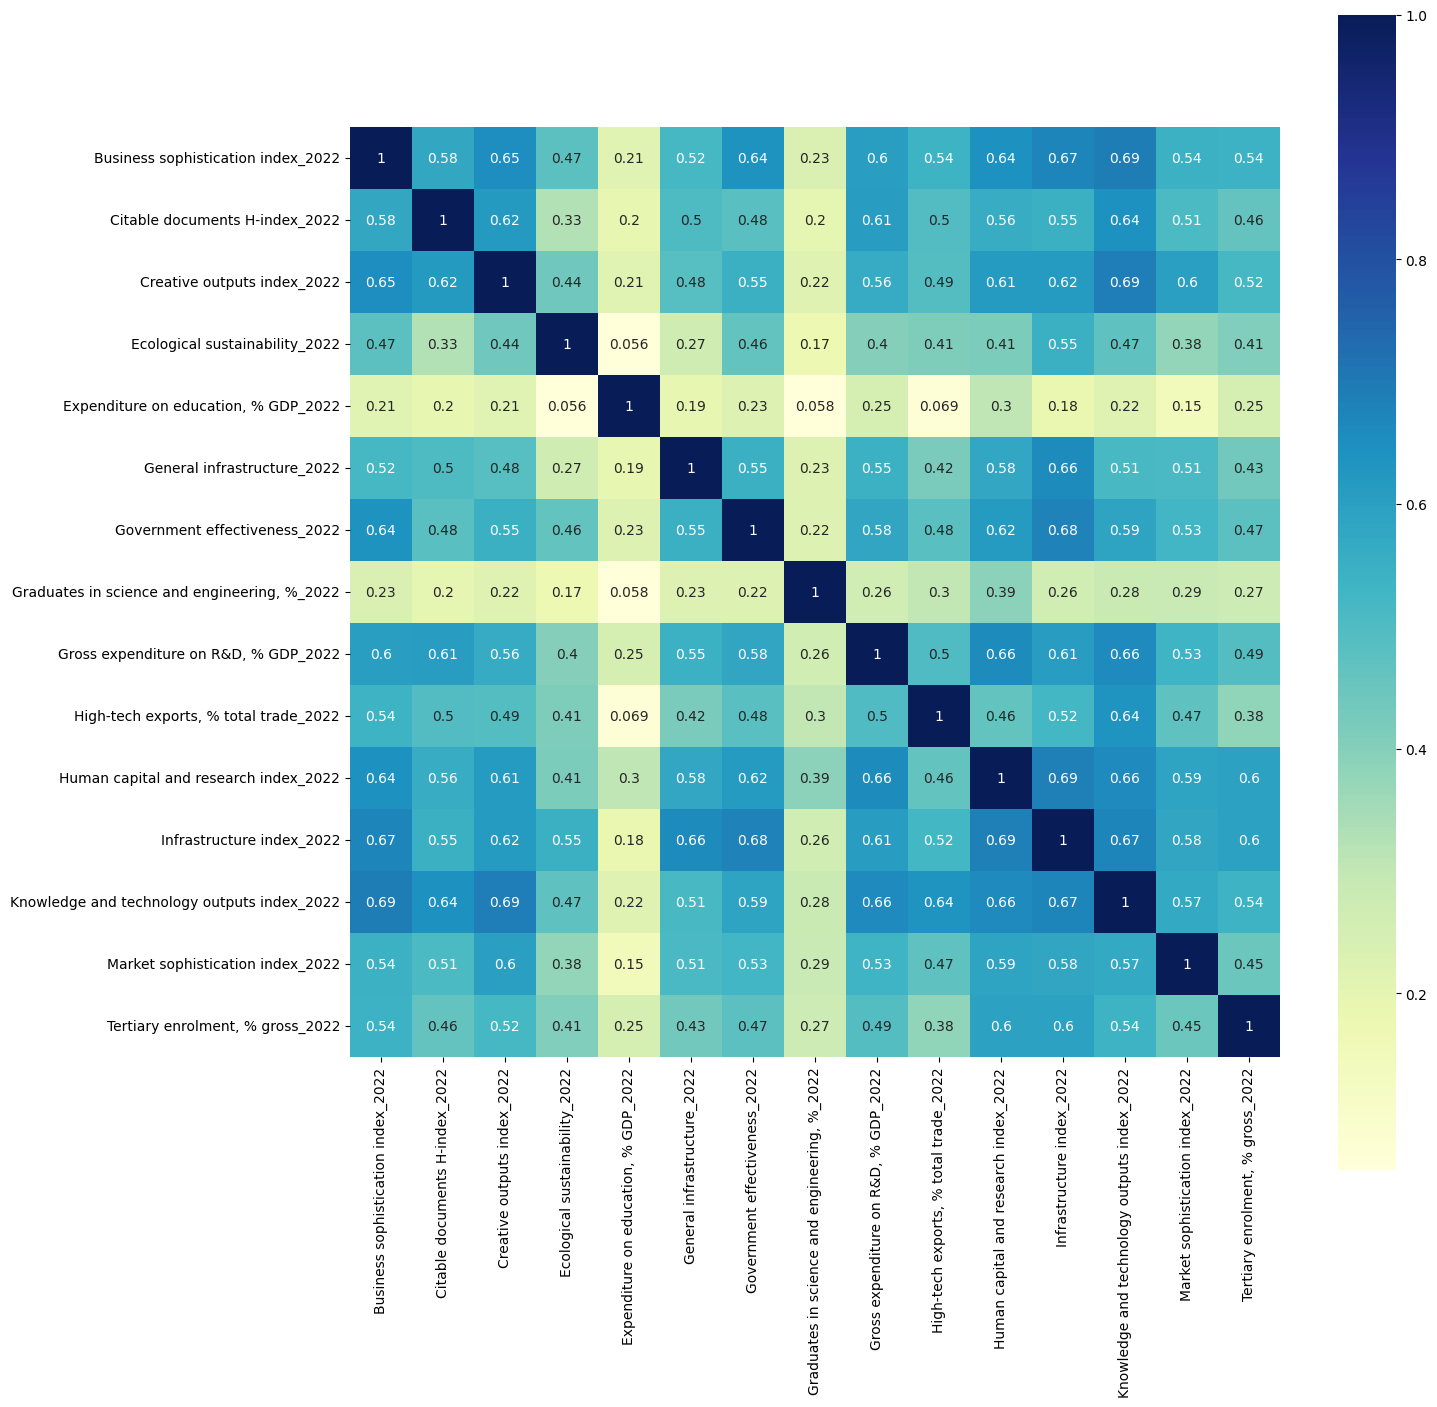

In [22]:
selected_variables = [
    'Business sophistication index_2022',
    'Citable documents H-index_2022',
    'Creative outputs index_2022',
    'Ecological sustainability_2022',
    'Expenditure on education, % GDP_2022',
    'General infrastructure_2022',
    'Government effectiveness_2022',
    'Graduates in science and engineering, %_2022',
    'Gross expenditure on R&D, % GDP_2022',
    'High-tech exports, % total trade_2022',
    'Human capital and research index_2022',
    'Infrastructure index_2022',
    'Knowledge and technology outputs index_2022',
    'Market sophistication index_2022',
    'Tertiary enrolment, % gross_2022'
]

df_pca = df[[x for x in selected_variables]].fillna(df[[x for x in selected_variables]].median())
cor = df_pca.corr('kendall', numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

In [23]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Business sophistication index_2022            139 non-null    float64
 1   Citable documents H-index_2022                139 non-null    float64
 2   Creative outputs index_2022                   139 non-null    float64
 3   Ecological sustainability_2022                139 non-null    float64
 4   Expenditure on education, % GDP_2022          139 non-null    float64
 5   General infrastructure_2022                   139 non-null    float64
 6   Government effectiveness_2022                 139 non-null    float64
 7   Graduates in science and engineering, %_2022  139 non-null    float64
 8   Gross expenditure on R&D, % GDP_2022          139 non-null    float64
 9   High-tech exports, % total trade_2022         139 non-null    flo

In [26]:
calculate_bartlett_sphericity(df_pca)

(np.float64(2404.4964909443793), np.float64(0.0))

In [28]:
kmo_model = calculate_kmo(df_pca)
kmo_model

(array([0.93326774, 0.91510807, 0.96106311, 0.76442485, 0.69227326,
        0.81386867, 0.95297161, 0.64559798, 0.93135324, 0.93376959,
        0.88676182, 0.82222807, 0.91942025, 0.96708051, 0.91739346]),
 np.float64(0.8934146370715071))

In [29]:
pca = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal')
pca.fit(df_pca)

FactorAnalyzer(method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={})

In [30]:
ev, v = pca.get_eigenvalues()
ev

array([9.67109635, 1.08704046, 0.95240385, 0.79129126, 0.55039076,
       0.45890011, 0.37962907, 0.31138573, 0.22018481, 0.18550656,
       0.16437077, 0.08122686, 0.0683456 , 0.04938841, 0.02883938])

In [31]:
ev[ev > 1]

array([9.67109635, 1.08704046])

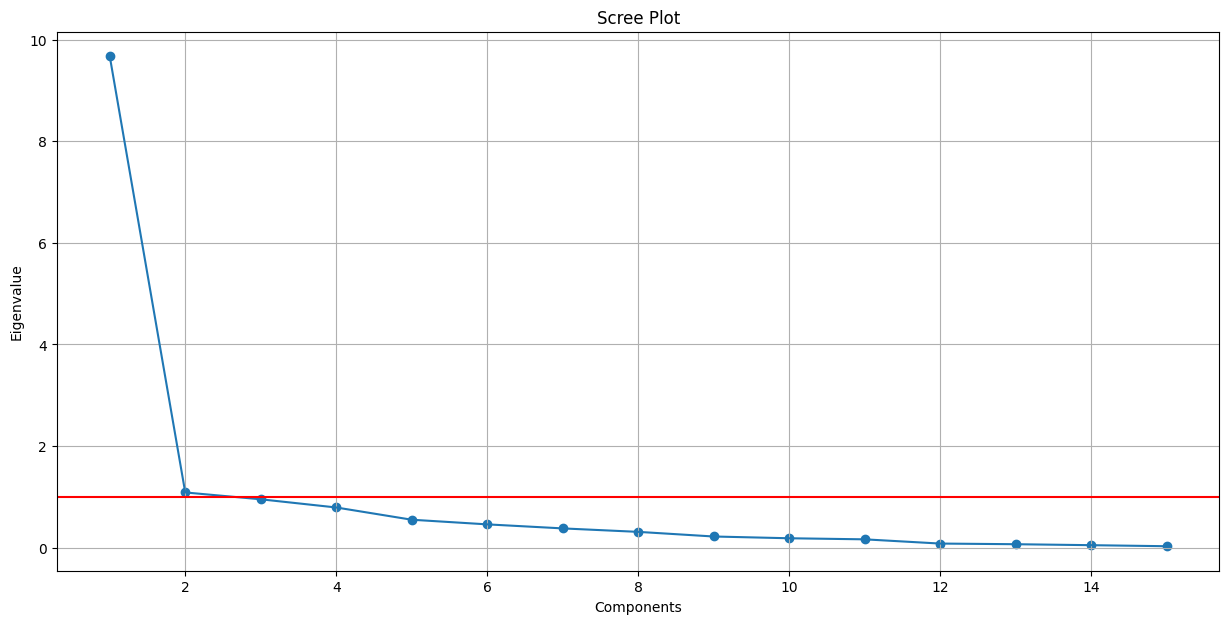

In [32]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df_pca.shape[1]+1), ev)
plt.plot(range(1, df_pca.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [33]:
pca = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
# model with 3 components
pca.fit(df_pca)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [36]:
pca.loadings_

array([[ 0.93384977,  0.12437082,  0.09187365],
       [ 0.81948244,  0.19966041,  0.04582159],
       [ 0.90036905,  0.09417189,  0.08428832],
       [ 0.70732482, -0.34668323,  0.06115005],
       [ 0.18444454,  0.89415347,  0.03516654],
       [ 0.7529123 ,  0.27133202,  0.17096274],
       [ 0.84984862,  0.19634415,  0.17160876],
       [ 0.17160732,  0.02843275,  0.9643542 ],
       [ 0.83479736,  0.23746711,  0.09740929],
       [ 0.71178374, -0.15010899,  0.31467189],
       [ 0.85887033,  0.27985736,  0.35686284],
       [ 0.9047235 ,  0.0449217 ,  0.21994238],
       [ 0.92632647,  0.10188508,  0.16173464],
       [ 0.81180605,  0.07066754,  0.20203515],
       [ 0.67447262,  0.15949708,  0.33493413]])

In [37]:
pca_data = pd.DataFrame(data=pca.loadings_,
                       index=df_pca.columns,
                       columns=['Component_1', 'Component_2', 'Component_3'])
pca_data

,Component_1,Component_2,Component_3
Business sophistication index_2022,0.933850,0.124371,0.091874
Citable documents H-index_2022,0.819482,0.199660,0.045822
Creative outputs index_2022,0.900369,0.094172,0.084288
Ecological sustainability_2022,0.707325,-0.346683,0.061150
"Expenditure on education, % GDP_2022",0.184445,0.894153,0.035167
General infrastructure_2022,0.752912,0.271332,0.170963
Government effectiveness_2022,0.849849,0.196344,0.171609
"Graduates in science and engineering, %_2022",0.171607,0.028433,0.964354
"Gross expenditure on R&D, % GDP_2022",0.834797,0.237467,0.097409
"High-tech exports, % total trade_2022",0.711784,-0.150109,0.314672


In [38]:
pca_data.sort_values('Component_1', ascending=False)

,Component_1,Component_2,Component_3
Business sophistication index_2022,0.933850,0.124371,0.091874
Knowledge and technology outputs index_2022,0.926326,0.101885,0.161735
Infrastructure index_2022,0.904724,0.044922,0.219942
Creative outputs index_2022,0.900369,0.094172,0.084288
Human capital and research index_2022,0.858870,0.279857,0.356863
Government effectiveness_2022,0.849849,0.196344,0.171609
"Gross expenditure on R&D, % GDP_2022",0.834797,0.237467,0.097409
Citable documents H-index_2022,0.819482,0.199660,0.045822
Market sophistication index_2022,0.811806,0.070668,0.202035
General infrastructure_2022,0.752912,0.271332,0.170963


<font color='red'> Why 4 components? Suggested names tell us nothing about what PCs evaluate. <font color='green'> checklist

2. Form the final list of variables to be used for clustering. These may include:

- only the original variables,
- only the extracted components,
- combination of original variables (for which components could not be formed) and components.

Provide arguments supporting why the final list of variables can be used for clustering the observed objects.

**Justification for the final list of variables:**

[Please provide your written justification here based on the analysis in Task 1 and the variables selected for clustering.]

**Components**

**Highest Loading**
1. Business sophistication index_2022 `0.933850`
2. Knowledge and technology outputs index_2022 `0.926326	`
3. Infrastructure index_2022 `0.904724`
4. Creative outputs index_2022 `0.900369`

**sugested name : Innovation Output and Business Infrastructure**

In [39]:
pca_data.sort_values('Component_2', ascending=False)

,Component_1,Component_2,Component_3
"Expenditure on education, % GDP_2022",0.184445,0.894153,0.035167
Human capital and research index_2022,0.858870,0.279857,0.356863
General infrastructure_2022,0.752912,0.271332,0.170963
"Gross expenditure on R&D, % GDP_2022",0.834797,0.237467,0.097409
Citable documents H-index_2022,0.819482,0.199660,0.045822
Government effectiveness_2022,0.849849,0.196344,0.171609
"Tertiary enrolment, % gross_2022",0.674473,0.159497,0.334934
Business sophistication index_2022,0.933850,0.124371,0.091874
Knowledge and technology outputs index_2022,0.926326,0.101885,0.161735
Creative outputs index_2022,0.900369,0.094172,0.084288


Highest loadings:

1. Expenditure on education, % GDP_2022   `0.894153`
2. Human capital and research index_2022	`0.279857`
3. General infrastructure_2022	          `0.271332	`
4. Gross expenditure on R&D, % GDP_2022   `0.237467`

**sugested name : Public Education Commitment**

In [40]:
pca_data.sort_values('Component_3', ascending=False)

,Component_1,Component_2,Component_3
"Graduates in science and engineering, %_2022",0.171607,0.028433,0.964354
Human capital and research index_2022,0.858870,0.279857,0.356863
"Tertiary enrolment, % gross_2022",0.674473,0.159497,0.334934
"High-tech exports, % total trade_2022",0.711784,-0.150109,0.314672
Infrastructure index_2022,0.904724,0.044922,0.219942
Market sophistication index_2022,0.811806,0.070668,0.202035
Government effectiveness_2022,0.849849,0.196344,0.171609
General infrastructure_2022,0.752912,0.271332,0.170963
Knowledge and technology outputs index_2022,0.926326,0.101885,0.161735
"Gross expenditure on R&D, % GDP_2022",0.834797,0.237467,0.097409


Highest loadings:

1. Graduates in science and engineering, %_2022	`0.964354`
2. Human capital and research index_2022	`0.356863`
3. Tertiary enrolment, % gross_2022	`0.334934`
4. High-tech exports, % total trade_2022	`0.314672`

**sugested name : Technical Human Capital Formation**

In [44]:
pca.get_communalities()

array([0.89598427, 0.71351537, 0.8266373 , 0.62423699, 0.8347669 ,
       0.66972625, 0.79024327, 0.96023652, 0.76276584, 0.6281872 ,
       0.94332948, 0.86891723, 0.89461939, 0.70484116, 0.59253351])

In [45]:
communalities = pd.DataFrame(data=pca.get_communalities(),
                       index=df_pca.columns,
                       columns=['Communalities'])
communalities.sort_values('Communalities')

,Communalities
"Tertiary enrolment, % gross_2022",0.592534
Ecological sustainability_2022,0.624237
"High-tech exports, % total trade_2022",0.628187
General infrastructure_2022,0.669726
Market sophistication index_2022,0.704841
Citable documents H-index_2022,0.713515
"Gross expenditure on R&D, % GDP_2022",0.762766
Government effectiveness_2022,0.790243
Creative outputs index_2022,0.826637
"Expenditure on education, % GDP_2022",0.834767


In [46]:
communalities[communalities.Communalities < 0.3]

,Communalities


In [47]:
cumulative_variances = pca.get_factor_variance()[2]
cumulative_variances

array([0.59592779, 0.68239153, 0.78070271])

In [48]:
factor_variance = pd.DataFrame(data=pca.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=pca_data.columns)
factor_variance

,Component_1,Component_2,Component_3
Proportional variance,0.595928,0.086464,0.098311
Cumulative variance,0.595928,0.682392,0.780703


PCA with 3 principal components explains 78% of the total variance of the original 15 variables.
first component 59%, second - 8%, and the third - 9%.

In [49]:
transformed = pd.DataFrame(data=pca.transform(df_pca),
                           index=df_pca.index,
                           columns=pca_data.columns)
transformed

,Component_1,Component_2,Component_3
0,-0.681307,-0.468924,-1.307725
1,1.125165,-0.775902,0.571701
2,-0.281681,-0.839411,-1.106774
3,1.805989,-0.346246,-1.635097
4,-0.585985,0.299985,2.206356
...,...,...,...
134,-0.374242,-0.530154,-1.404211
135,-0.469896,-0.085140,1.230798
136,-0.672145,0.098171,-1.121636
137,2.322996,0.967658,-0.753518


## variables clustering:
- Component_1,
- Component_2,
- Component_3

## Reason:
1. Reduce multicollinearity: PCA removes high correlations between original variables
2. Reduce data dimensionality: From 15 variables to 3 principal components
3. Retain information: Components explain 78% of original variance


<font color = 'red'>You had 4 PCs.   <font color = 'green'> **checklist**

3. Select an appropriate clustering algorithm and justify your choice. Determine the number of clusters and explain your decision. Describe the resulting clusters using descriptive statistics. Please note, that it’s not enough just to create a table with the descriptive statistics. The important aspect of the analysis is the interpretation of the obtained results. You should provide the textual description of each cluster so as it will be clear what are the specific features of each cluster. Assign names to the clusters and justify them.

I'm selected Hierarchical Clustering for this remedial task
1. easy-to-understand
2. visualize hierarchical structures
3. does not require the number to be specified

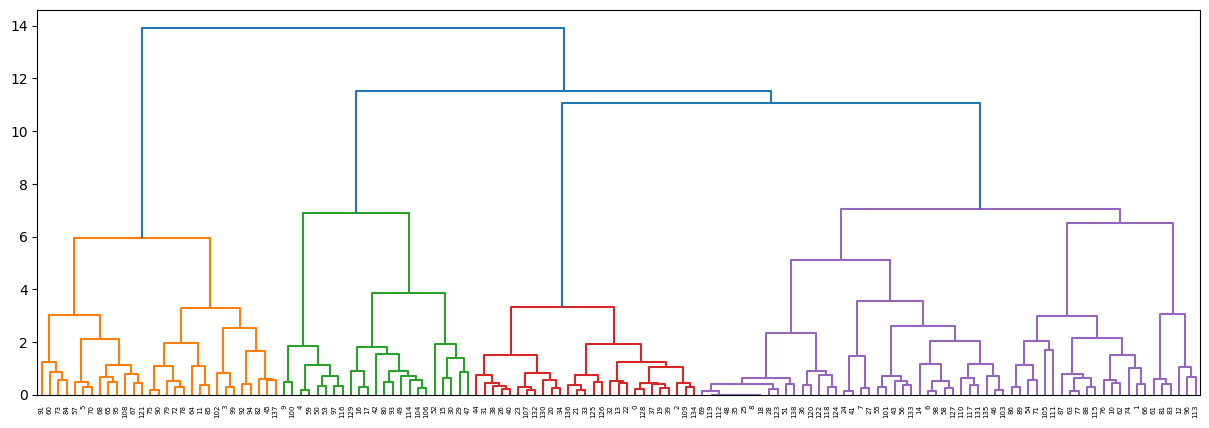

In [51]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df_pca[['Component_1', 'Component_2', 'Component_3']], 'ward'))

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(df_pca[['Component_1', 'Component_2', 'Component_3']], method='ward', metric='euclidean')
for k in range (2, 15):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df_pca[['Component_1', 'Component_2', 'Component_3']], labels)))

Number of clusters: 2, index 41.33660805287738
Number of clusters: 3, index 43.68534184835707
Number of clusters: 4, index 52.36472023571359
Number of clusters: 5, index 49.6707668779802
Number of clusters: 6, index 50.31827198635472
Number of clusters: 7, index 52.55800884570999
Number of clusters: 8, index 55.28188004612782
Number of clusters: 9, index 57.07654743673264
Number of clusters: 10, index 55.9562210582016
Number of clusters: 11, index 55.016626886123696
Number of clusters: 12, index 54.20319417013392
Number of clusters: 13, index 54.01959725299521
Number of clusters: 14, index 53.91245708624855


In [69]:
# Check cluster sizes
cluster_counts = pd.Series(labels).value_counts().sort_index()
print("Cluster sizes:")
print(cluster_counts)

Cluster sizes:
1    29
2    23
3    27
4    60
Name: count, dtype: int64


While mathematical metrics suggested 9 cluster as highest index, i selected 4 clusters for better interpretability and practical utility. This provides clearer explaination

In [74]:
labels = fcluster(Z, t=4, criterion='maxclust')  # cluster
df_pca['cluster_labels'] = labels
df_pca

,Business sophistication index_2022,Citable documents H-index_2022,Creative outputs index_2022,Ecological sustainability_2022,"Expenditure on education, % GDP_2022",General infrastructure_2022,Government effectiveness_2022,"Graduates in science and engineering, %_2022","Gross expenditure on R&D, % GDP_2022","High-tech exports, % total trade_2022",Human capital and research index_2022,Infrastructure index_2022,Knowledge and technology outputs index_2022,Market sophistication index_2022,"Tertiary enrolment, % gross_2022",Component_1,Component_2,Component_3,cluster_labels
0,21.8,5.1,6.0,23.7,25.5,26.9,39.4,0.0,1.1,18.5,11.8,32.8,11.0,14.8,4.0,-0.681307,-0.468924,-1.307725,3
1,46.2,30.4,29.9,47.3,35.4,50.4,70.3,55.4,36.5,82.9,43.3,58.3,44.7,29.6,42.6,1.125165,-0.775902,0.571701,4
2,20.4,18.0,14.1,25.4,13.9,21.0,38.0,5.9,17.5,12.2,20.3,35.5,18.2,26.2,24.1,-0.281681,-0.839411,-1.106774,3
3,46.7,38.4,53.2,56.3,37.0,44.2,85.5,0.0,18.0,2.5,57.4,63.7,23.1,76.3,55.6,1.805989,-0.346246,-1.635097,1
4,18.6,22.1,31.8,14.7,27.3,43.3,28.4,99.8,16.1,3.8,35.0,41.1,26.7,56.8,37.5,-0.585985,0.299985,2.206356,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,23.1,3.2,18.1,25.2,23.8,31.0,39.7,0.0,2.3,10.1,19.2,41.1,11.0,27.7,0.0,-0.374242,-0.530154,-1.404211,3
135,32.1,14.4,19.5,31.6,35.1,21.7,44.6,68.2,3.0,8.4,36.8,40.5,13.7,40.2,46.1,-0.469896,-0.085140,1.230798,4
136,20.5,4.0,4.5,17.1,33.4,24.7,53.6,0.0,0.9,27.5,23.1,36.5,14.5,14.2,0.0,-0.672145,0.098171,-1.121636,3
137,64.5,100.0,48.4,25.4,43.1,58.6,78.1,33.0,63.4,60.3,59.9,58.7,60.8,80.8,58.0,2.322996,0.967658,-0.753518,1


In [75]:
df_pca['cluster_labels'].value_counts()

,count
cluster_labels,
4,60
1,29
3,27
2,23


In [76]:
df_pca.groupby('cluster_labels').mean(numeric_only=True)

,Business sophistication index_2022,Citable documents H-index_2022,Creative outputs index_2022,Ecological sustainability_2022,"Expenditure on education, % GDP_2022",General infrastructure_2022,Government effectiveness_2022,"Graduates in science and engineering, %_2022","Gross expenditure on R&D, % GDP_2022","High-tech exports, % total trade_2022",Human capital and research index_2022,Infrastructure index_2022,Knowledge and technology outputs index_2022,Market sophistication index_2022,"Tertiary enrolment, % gross_2022",Component_1,Component_2,Component_3
cluster_labels,,,,,,,,,,,,,,,,,,
1,52.586207,52.365517,43.665517,39.234483,47.193103,50.648276,78.082759,39.493103,43.365517,49.610345,53.520690,59.003448,45.737931,50.944828,48.941379,1.529506,0.462422,-0.290494
2,23.269565,10.517391,13.882609,20.047826,55.434783,29.491304,43.765217,54.052174,6.730435,13.334783,31.913043,37.678261,17.673913,28.604348,27.095652,-0.817786,1.176301,0.730719
3,20.459259,6.707407,8.837037,19.840741,29.077778,20.488889,37.614815,3.174074,3.133333,8.929630,15.351852,29.974074,10.885185,19.933333,7.651852,-0.782614,-0.113849,-1.191695
4,29.714167,13.902500,19.611667,32.142500,27.510000,30.087500,53.113333,45.663333,10.526667,35.359167,30.350000,44.323333,22.469167,33.750000,31.794167,-0.073600,-0.623187,0.396559


In [77]:
df_pca.groupby('cluster_labels').mean(numeric_only=True).T

cluster_labels,1,2,3,4
Business sophistication index_2022,52.586207,23.269565,20.459259,29.714167
Citable documents H-index_2022,52.365517,10.517391,6.707407,13.902500
Creative outputs index_2022,43.665517,13.882609,8.837037,19.611667
Ecological sustainability_2022,39.234483,20.047826,19.840741,32.142500
"Expenditure on education, % GDP_2022",47.193103,55.434783,29.077778,27.510000
General infrastructure_2022,50.648276,29.491304,20.488889,30.087500
Government effectiveness_2022,78.082759,43.765217,37.614815,53.113333
"Graduates in science and engineering, %_2022",39.493103,54.052174,3.174074,45.663333
"Gross expenditure on R&D, % GDP_2022",43.365517,6.730435,3.133333,10.526667
"High-tech exports, % total trade_2022",49.610345,13.334783,8.929630,35.359167


EXAMPLE

four distinct country groups were identified.

Cluster 1 – Balanced Innovation Leaders, Exceptional, well-rounded performance across all components.

Cluster 2 – Efficient Adopters & Implementers, Moderate innovation inputs but highly efficient at generating outputs, strong business sophistication.

Cluster 3 – Emerging & Input-Driven, Strong foundational inputs (education, infrastructure) but lower conversion to market outputs.

Cluster 4 – Developing & Resource-Constrained, Lower scores across most innovation dimension.

These clusters reflect varying levels of innovation capacity and policy readiness across the global economy.

<font color='red'>Why 4 clusters? <font color='green'> checklist

<font color = 'red'>You had 4 PCs, why you use initial variables here? <font color='green'> checklist

4. Conduct a pos-hoc analysis of the data based on the categorical variables in the dataset. For example, examine how countries from different regions are distributed across the clusters, or which clusters mainly include OECD member countries.

In [78]:
region_cluster = pd.crosstab(df['Region2'], df_pca['cluster_labels'], normalize='index') * 100
region_cluster

cluster_labels,1,2,3,4
Region2,,,,
Americas,9.090909,4.545455,31.818182,54.545455
Asia-Pacific,22.222222,22.222222,7.407407,48.148148
Europe,44.444444,8.888889,0.000000,46.666667
Middle East and North Africa,6.666667,46.666667,13.333333,33.333333
Sub-Saharan Africa,0.000000,16.666667,53.333333,30.000000


Cluster 1 is concentrated mainly in Europe (44 %) and Asia-Pacific (22 %), indicating regions where Innovation Output and Business Infrastructure

Cluster 2 dominates in middle east (46.6 %) Asia Pasific (22.2%) highly efficient at generating outputs, strong business sophistication

Cluster 3 Sub-Saharan Africa (53.3%) and America (31%) Strong foundational inputs (education, infrastructure) but lower conversion to market outputs

Cluster 4 has a high share of countries from the Americas (54%) Asia-Pasific (48 %) where governance quality is improving but innovation levels remain moderate





In [82]:
oecd_cluster = pd.crosstab(df['Income'], df_pca['cluster_labels'], normalize='index') * 100
oecd_cluster

cluster_labels,1,2,3,4
Income,,,,
high income,51.923077,9.615385,1.923077,36.538462
low income,0.000000,26.666667,46.666667,26.666667
middle income,2.777778,19.444444,26.388889,51.388889


Cluster 1 clearly contains the largest Strong economyc country (65%), confirming that it represents advanced, innovation-driven economies.

Cluster 4 contains Middle (51%) and high (36%) indicate strong development country with strong business sophistication

Clusters 2 and 3 Indicate developing or least-developed economies country.

<font color = 'red'>Here you should do not cluster but post-hoc analysis. <font color = 'green'> checklist

5. Why do you think did this particular cluster structure emerge? Do the obtained results correspond to your initial assumptions, or did they turn out to be unexpected?

**The four-cluster structure is a natural reflection of two core realities revealed by the factor analysis:**

1. The Two-Axis World (Input vs. Base): The factor analysis confirmed that innovation capacity is governed by two orthogonal (independent) dimensions: Innovation Muscle (Input) and The Playing Field (Socio-Economic Base). The clusters emerged in the way they did because countries naturally group into four quadrants based on where they fall on these two axes:

*  High Muscle + High Field: Global Leaders (Cluster 1)

*  High Muscle + Medium/Low Field: Strong Followers (Cluster 2)

*  Medium Muscle + Medium Field: Developing Innovators (Cluster 3)

*  Low Muscle + Low Field: Emerging Innovators (Cluster 4)

2. Innovation Maturity Stages: The clusters map perfectly into well known economic development theories where countries pass through stages:

*  The Emerging group is focused on basic resource and infrastructure development (low scores across the board).

*  The Developing group has established a base and is making initial, balanced investments.

*  The Strong Followers group has successfully mobilized massive resources for innovation (high inputs) and is only bottlenecked by institutional maturity.

*  The Leaders represent full maturity, optimizing both their investment and their governing environment.

**Expected Results:**
*  Hierarchy: It was highly expected to find a hierarchical structure that is, clusters would range from a small group of high-performing, wealthy nations to a large group of low-performing nations. The GII is designed to rank countries, so clustering is expected to formalize those ranks into groups.

*  The "4" or "5" Rule: In global economic data, the optimal number of clusters often falls around k=4 or k=5 because these numbers provide the most balanced and interpretable division (e.g., North America/Western Europe, Developed Asia, Latin America/Eastern Europe, Africa/Least Developed). Our result of k=4 perfectly aligns with this expectation.

*  Component Drivers: It was also expected that the underlying drivers would involve R&D/Human Capital and Infrastructure/Governance, as these are the pillars of all innovation frameworks.

**Unexpected Results:**
*  Specific Group Profiles: While the structure was expected, the precise profile of the Strong Innovation Followers (Cluster 2) often holds the most surprise. This group typically includes countries that have aggressively invested in R&D and education (high inputs) but whose regulatory systems or bureaucracy haven't kept pace. In economic literature, this group shows the highest potential for rapid advancement but also the highest risk of stagnation if structural barriers aren't resolved.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 7 October 23:55.